# Data Cleansing

# Step 1: Install Spark and PySpark

In [1]:
!apt-get update                                                                         # Update all packages in this VM
!apt-get install openjdk-8-jdk-headless -qq > /dev/null                                 # Install Java Development Kit (necessary for Spark installation)
!wget -q https://archive.apache.org/dist/spark/spark-3.5.1/spark-3.5.1-bin-hadoop3.tgz  # Install Spark 3.5.1
!tar xzvf spark-3.5.1-bin-hadoop3.tgz                                                   # Unzip the Spark 3.5.1 file
!pip install -q findspark                                                               # Install the Python package for connecting to Spark

# Set environment variables so that Python can recognize Spark
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.5.1-bin-hadoop3"
os.environ["PATH"] += ":/content/spark-3.5.1-bin-hadoop3/bin"

# Install PySpark version 3.5.1 in Python
!pip install pyspark==3.5.1

Get:1 https://cli.github.com/packages stable InRelease [3,917 B]
Hit:2 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:3 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:4 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:6 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Fetched 3,917 B in 2s (2,122 B/s)
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
spark-3.5.1-bin-hadoop3/
spark-3.5.1-bin-hadoop3/sbin/
spark-3.5.1-bin-hadoop3/sbin/spark-config.sh
spark-3.5.1-bin-hadoop3/sbin/stop-slave.sh
spar

In [2]:
# How many cores does the Google Colab server have?
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 79
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
stepping	: 0
microcode	: 0xffffffff
cpu MHz		: 2200.160
cache size	: 56320 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm rdseed adx smap xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs taa mmio_stale_data retbleed bhi its
bogomips	: 4400.32
clflush size	: 64
cache_alignment	: 64
address sizes

In [3]:
# Create a Spark Session to use Spark
from pyspark.sql import SparkSession
spark = SparkSession.builder \
    .master("local[*]") \
    .appName("Road to Data Engineer 3.0 App") \
    .getOrCreate()

In [4]:
# Check Python version
import sys
sys.version_info

sys.version_info(major=3, minor=12, micro=12, releaselevel='final', serial=0)

In [5]:
# Check Spark version
spark.version

'3.5.1'

## Read Data
Download the Parquet file from the results of Workshop 1 (with slight modifications added so you can practice data cleaning in this Workshop 2).

In [6]:
!wget https://file.designil.com/f/6BamyF+ -O w2_input.parquet #-O to rename the file

--2026-01-06 14:12:34--  https://file.designil.com/f/6BamyF+
Resolving file.designil.com (file.designil.com)... 104.21.8.81, 172.67.130.97, 2606:4700:3035::ac43:8261, ...
Connecting to file.designil.com (file.designil.com)|104.21.8.81|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://cdn-std.droplr.net/files/acc_513973/6BamyF [following]
--2026-01-06 14:12:34--  https://cdn-std.droplr.net/files/acc_513973/6BamyF
Resolving cdn-std.droplr.net (cdn-std.droplr.net)... 99.84.118.20, 99.84.118.66, 99.84.118.59, ...
Connecting to cdn-std.droplr.net (cdn-std.droplr.net)|99.84.118.20|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6040473 (5.8M) [application/octet-stream]
Saving to: ‘w2_input.parquet’

w2_input.parquet    100%[===================>]   5.76M  34.9MB/s    in 0.2s    

2026-01-06 14:12:35 (34.9 MB/s) - ‘w2_input.parquet’ saved [6040473/6040473]



In [7]:
dt = spark.read.parquet('w2_input.parquet')

dt

DataFrame[transaction_id: string, date: string, product_id: string, price: double, quantity: bigint, customer_id: double, product_name: string, customer_country: string, customer_name: string, total_amount: double, thb_amount: double]

In [8]:
dt.show(10)

+--------------+----------+----------+-----+--------+-----------+--------------------+----------------+-------------+------------------+------------------+
|transaction_id|      date|product_id|price|quantity|customer_id|        product_name|customer_country|customer_name|      total_amount|        thb_amount|
+--------------+----------+----------+-----+--------+-----------+--------------------+----------------+-------------+------------------+------------------+
|        581482|2024-05-10|     22485|21.47|      12|    17490.0|Set Of 2 Wooden M...|  United Kingdom| Sara Griffin|            257.64|        11792.1828|
|        581475|2024-05-10|     22596|10.65|      36|    13069.0|Christmas Star Wi...|  United Kingdom| Michael Holt|383.40000000000003|17548.218000000004|
|        581475|2024-05-10|     23235|11.53|      12|    13069.0|Storage Tin Vinta...|  United Kingdom| Michael Holt|138.35999999999999|         6332.7372|
|        581475|2024-05-10|     23272|10.65|      12|    13069.0

# Step 2: Data Profiling

In [9]:
# Check which columns are available
dt

DataFrame[transaction_id: string, date: string, product_id: string, price: double, quantity: bigint, customer_id: double, product_name: string, customer_country: string, customer_name: string, total_amount: double, thb_amount: double]

In [10]:
# View the data
dt.show()

+--------------+----------+----------+-----+--------+-----------+--------------------+----------------+-------------+------------------+------------------+
|transaction_id|      date|product_id|price|quantity|customer_id|        product_name|customer_country|customer_name|      total_amount|        thb_amount|
+--------------+----------+----------+-----+--------+-----------+--------------------+----------------+-------------+------------------+------------------+
|        581482|2024-05-10|     22485|21.47|      12|    17490.0|Set Of 2 Wooden M...|  United Kingdom| Sara Griffin|            257.64|        11792.1828|
|        581475|2024-05-10|     22596|10.65|      36|    13069.0|Christmas Star Wi...|  United Kingdom| Michael Holt|383.40000000000003|17548.218000000004|
|        581475|2024-05-10|     23235|11.53|      12|    13069.0|Storage Tin Vinta...|  United Kingdom| Michael Holt|138.35999999999999|         6332.7372|
|        581475|2024-05-10|     23272|10.65|      12|    13069.0

In [11]:
# View the first 100 rows of data
dt.show(100)

+--------------+----------+----------+-----+--------+-----------+--------------------+----------------+--------------+------------------+------------------+
|transaction_id|      date|product_id|price|quantity|customer_id|        product_name|customer_country| customer_name|      total_amount|        thb_amount|
+--------------+----------+----------+-----+--------+-----------+--------------------+----------------+--------------+------------------+------------------+
|        581482|2024-05-10|     22485|21.47|      12|    17490.0|Set Of 2 Wooden M...|  United Kingdom|  Sara Griffin|            257.64|        11792.1828|
|        581475|2024-05-10|     22596|10.65|      36|    13069.0|Christmas Star Wi...|  United Kingdom|  Michael Holt|383.40000000000003|17548.218000000004|
|        581475|2024-05-10|     23235|11.53|      12|    13069.0|Storage Tin Vinta...|  United Kingdom|  Michael Holt|138.35999999999999|         6332.7372|
|        581475|2024-05-10|     23272|10.65|      12|    1

In [12]:
# View the first 100 rows of data without ellipsis (…)
dt.show(100, truncate = False)

+--------------+----------+----------+-----+--------+-----------+-----------------------------------+----------------+--------------+------------------+------------------+
|transaction_id|date      |product_id|price|quantity|customer_id|product_name                       |customer_country|customer_name |total_amount      |thb_amount        |
+--------------+----------+----------+-----+--------+-----------+-----------------------------------+----------------+--------------+------------------+------------------+
|581482        |2024-05-10|22485     |21.47|12      |17490.0    |Set Of 2 Wooden Market Crates      |United Kingdom  |Sara Griffin  |257.64            |11792.1828        |
|581475        |2024-05-10|22596     |10.65|36      |13069.0    |Christmas Star Wish List Chalkboard|United Kingdom  |Michael Holt  |383.40000000000003|17548.218000000004|
|581475        |2024-05-10|23235     |11.53|12      |13069.0    |Storage Tin Vintage Leaf           |United Kingdom  |Michael Holt  |138.359

In [13]:
# Check the data type of each column
dt.dtypes

[('transaction_id', 'string'),
 ('date', 'string'),
 ('product_id', 'string'),
 ('price', 'double'),
 ('quantity', 'bigint'),
 ('customer_id', 'double'),
 ('product_name', 'string'),
 ('customer_country', 'string'),
 ('customer_name', 'string'),
 ('total_amount', 'double'),
 ('thb_amount', 'double')]

In [14]:
# Another command to view each column’s information (Schema)
dt.printSchema()

root
 |-- transaction_id: string (nullable = true)
 |-- date: string (nullable = true)
 |-- product_id: string (nullable = true)
 |-- price: double (nullable = true)
 |-- quantity: long (nullable = true)
 |-- customer_id: double (nullable = true)
 |-- product_name: string (nullable = true)
 |-- customer_country: string (nullable = true)
 |-- customer_name: string (nullable = true)
 |-- total_amount: double (nullable = true)
 |-- thb_amount: double (nullable = true)



nullable means that the value can be null (empty)

In [15]:
# Count the number of rows and columns
print((dt.count(), len(dt.columns)))

(536350, 11)


In [16]:
dt.columns

['transaction_id',
 'date',
 'product_id',
 'price',
 'quantity',
 'customer_id',
 'product_name',
 'customer_country',
 'customer_name',
 'total_amount',
 'thb_amount']

In [17]:
# Summarize statistical information
dt.describe().show()

+-------+------------------+----------+------------------+------------------+------------------+------------------+--------------------+----------------+-------------+------------------+--------------------+
|summary|    transaction_id|      date|        product_id|             price|          quantity|       customer_id|        product_name|customer_country|customer_name|      total_amount|          thb_amount|
+-------+------------------+----------+------------------+------------------+------------------+------------------+--------------------+----------------+-------------+------------------+--------------------+
|  count|            536350|    536350|            536350|            536350|            536350|            536295|              536350|          536350|       536350|            536350|              536350|
|   mean| 559978.9296258752|      NULL|27501.334602703962|12.662182287696377| 9.919347441036637|15227.893178194838|                NULL|            NULL|         NULL|1

In [18]:
# Another command to summarize statistical information
dt.summary().show()

+-------+------------------+----------+------------------+------------------+------------------+------------------+--------------------+----------------+-------------+------------------+--------------------+
|summary|    transaction_id|      date|        product_id|             price|          quantity|       customer_id|        product_name|customer_country|customer_name|      total_amount|          thb_amount|
+-------+------------------+----------+------------------+------------------+------------------+------------------+--------------------+----------------+-------------+------------------+--------------------+
|  count|            536350|    536350|            536350|            536350|            536350|            536295|              536350|          536350|       536350|            536350|              536350|
|   mean| 559978.9296258752|      NULL|27501.334602703962|12.662182287696377| 9.919347441036637|15227.893178194838|                NULL|            NULL|         NULL|1

In [19]:
# Summarize statistics for specific columns only
dt.select("price").describe().show()

+-------+------------------+
|summary|             price|
+-------+------------------+
|  count|            536350|
|   mean|12.662182287696377|
| stddev| 8.490450200816936|
|    min|              5.13|
|    max|            660.62|
+-------+------------------+



## Exercise 1
The boss wants to know which columns have missing values and to display the rows that contain missing values.

In [20]:
# Find which columns have missing values
dt.summary("count").show()

+-------+--------------+------+----------+------+--------+-----------+------------+----------------+-------------+------------+----------+
|summary|transaction_id|  date|product_id| price|quantity|customer_id|product_name|customer_country|customer_name|total_amount|thb_amount|
+-------+--------------+------+----------+------+--------+-----------+------------+----------------+-------------+------------+----------+
|  count|        536350|536350|    536350|536350|  536350|     536295|      536350|          536350|       536350|      536350|    536350|
+-------+--------------+------+----------+------+--------+-----------+------------+----------------+-------------+------------+----------+



In [21]:
# Display rows that have missing values
dt.where( dt.customer_id.isNull() ).show()

+--------------+----------+----------+-----+--------+-----------+--------------------+----------------+-------------+-------------------+-------------------+
|transaction_id|      date|product_id|price|quantity|customer_id|        product_name|customer_country|customer_name|       total_amount|         thb_amount|
+--------------+----------+----------+-----+--------+-----------+--------------------+----------------+-------------+-------------------+-------------------+
|       C581406|2024-05-09|    46000M| 6.19|    -240|       NULL|Polyester Filler ...|  United Kingdom| Allen Morgan|-1485.6000000000001|         -68397.024|
|       C581406|2024-05-09|    46000S| 6.19|    -300|       NULL|Polyester Filler ...|  United Kingdom| Allen Morgan|-1857.0000000000002| -85496.28000000001|
|       C575153|2024-04-09|     22947|44.25|      -1|       NULL|Wooden Advent Cal...|  United Kingdom| Allen Morgan|             -44.25|-2036.4734999999998|
|       C574288|2024-04-04|     22178|25.37|      -1

## YData Profiling

In [22]:
!pip install ydata-profiling

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 398.7/398.7 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.7/296.7 kB 19.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 39.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.7/679.7 kB 46.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 3.1 MB/s eta 0:00:00


In [23]:
from ydata_profiling import ProfileReport
profile = ProfileReport(dt.toPandas(), title="Profiling Report")

In [24]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 11/11 [00:16<00:00,  1.53s/it]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Step 3: EDA - Exploratory Data Analysis

We will try performing Exploratory Data Analysis (EDA) using both non-graphical and graphical

##1) Non-Graphical EDA

We can use Spark commands to retrieve the data we need

In [25]:
#Numerical data
dt.where(dt.price >= 100).show()

+--------------+----------+----------+------+--------+-----------+--------------------+----------------+--------------------+------------+------------------+
|transaction_id|      date|product_id| price|quantity|customer_id|        product_name|customer_country|       customer_name|total_amount|        thb_amount|
+--------------+----------+----------+------+--------+-----------+--------------------+----------------+--------------------+------------+------------------+
|        577130|2024-04-18|     22827|179.37|       1|    15861.0|Rustic Seventeen ...|  United Kingdom|        Kelly Barnes|      179.37|        8207.79183|
|       C577131|2024-04-18|     22827|179.37|      -1|    15861.0|Rustic Seventeen ...|  United Kingdom|        Kelly Barnes|     -179.37|       -8207.79183|
|        576635|2024-04-17|     22828|158.88|       2|    15269.0|Regency Mirror Wi...|  United Kingdom|     Jerry Henderson|      317.76|         14545.464|
|        576512|2024-04-16|     22823| 123.0|       

In [26]:
#Text data
dt.where(dt.customer_country == 'Australia').show()

+--------------+----------+----------+-----+--------+-----------+--------------------+----------------+----------------+------------------+------------------+
|transaction_id|      date|product_id|price|quantity|customer_id|        product_name|customer_country|   customer_name|      total_amount|        thb_amount|
+--------------+----------+----------+-----+--------+-----------+--------------------+----------------+----------------+------------------+------------------+
|        578459|2024-04-25|     22338| 6.19|      96|    12388.0|Star Decoration P...|       Australia|Stephanie Morris|            594.24|27531.139199999998|
|        578459|2024-04-25|     22600| 6.19|      20|    12388.0|Christmas Retrosp...|       Australia|Stephanie Morris|123.80000000000001|          5735.654|
|        578459|2024-04-25|     22910| 6.19|      20|    12388.0|Paper Chain Kit V...|       Australia|Stephanie Morris|123.80000000000001|          5735.654|
|        578459|2024-04-25|     22086| 6.19|  

##Exercise 2:
Q1: How many rows of purchases occurred in May 2024?

Q2: How many rows of purchases occurred in June 2024?

In [27]:
# Q1
dt.where(dt.date.startswith("2024-05")).count()

28771

In [28]:
# Q2
dt.where(dt.date.startswith("2024-06")).count()

0

## 2) Graphical EDA

Spark was not designed for data plotting. Therefore, we will use pandas together with the seaborn and matplotlib packages to plot the data instead.

We will get to know:

1.Boxplot

2.Histogram

3.Scatterplot

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [30]:
# Convert Spark DataFrame to Pandas DataFrame
dt_pd = dt.toPandas()

In [31]:
# View a sample of the data
dt_pd.head()

transaction_id        date product_id  price  quantity  customer_id  \
0         581482  2024-05-10      22485  21.47        12      17490.0   
1         581475  2024-05-10      22596  10.65        36      13069.0   
2         581475  2024-05-10      23235  11.53        12      13069.0   
3         581475  2024-05-10      23272  10.65        12      13069.0   
4         581475  2024-05-10      23239  11.94         6      13069.0   

                          product_name customer_country customer_name  \
0        Set Of 2 Wooden Market Crates   United Kingdom  Sara Griffin   
1  Christmas Star Wish List Chalkboard   United Kingdom  Michael Holt   
2             Storage Tin Vintage Leaf   United Kingdom  Michael Holt   
3    Tree T-Light Holder Willie Winkie   United Kingdom  Michael Holt   
4    Set Of 4 Knick Knack Tins Poppies   United Kingdom  Michael Holt   

   total_amount  thb_amount  
0        257.64  11792.1828  
1        383.40  17548.2180  
2        138.36   6332.7372  
3        127.80   5849.4060  
4         71.64   3278.9628

<Axes: xlabel='price'>

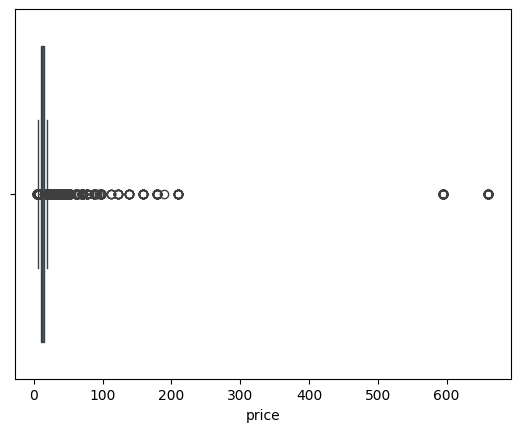

In [32]:
#Plot 1) Boxplot – Show the distribution of numerical data
sns.boxplot(x = dt_pd['price'])

<Axes: xlabel='price', ylabel='Count'>

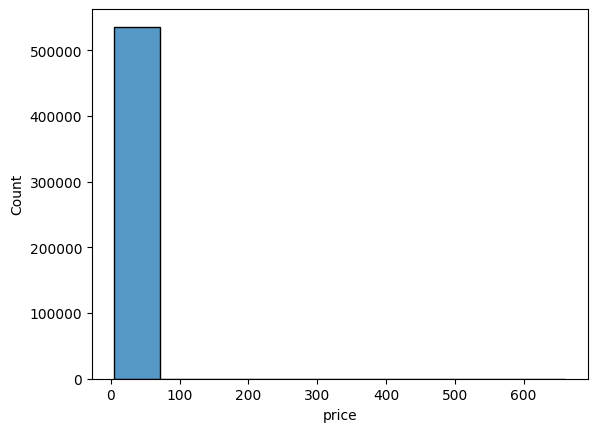

In [33]:
# Plot 2) Histogram – Show the distribution of numerical data
# bins = number of bars to display
sns.histplot(dt_pd['price'], bins=10)

<Axes: xlabel='price', ylabel='Count'>

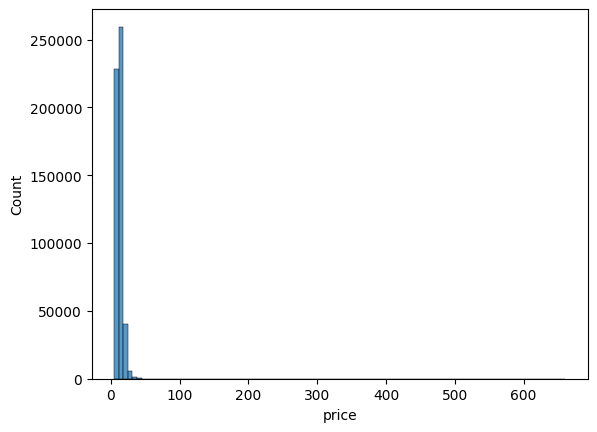

In [34]:
# Increase bins to show more detailed data
sns.histplot(dt_pd['price'], bins=100)

###Exercise 3:

The above plot is hard to read. How can we zoom in to see the values more clearly?

<Axes: xlabel='price', ylabel='Count'>

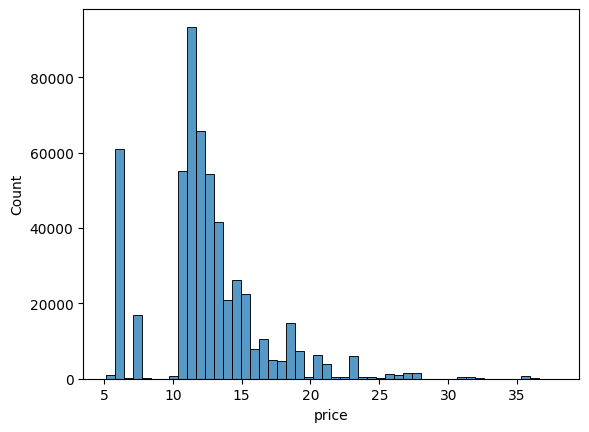

In [35]:
sns.histplot(dt_pd[dt_pd['price']<40]['price'], bins=50)

<Axes: xlabel='quantity', ylabel='price'>

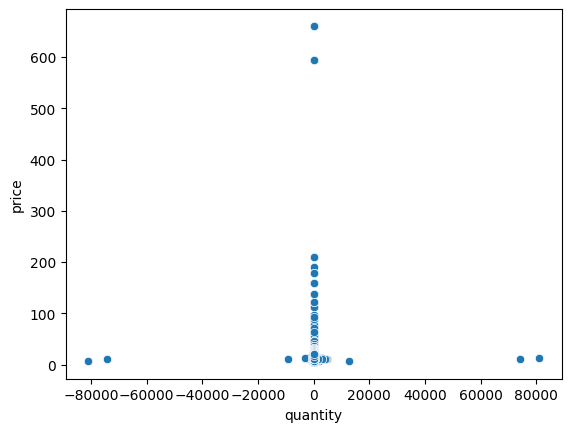

In [36]:
# Plot 3) Scatterplot – Show the relationship between two variables
# For example, if we want to see how Quantity and Price are related
sns.scatterplot(x=dt_pd.quantity, y=dt_pd.price)

# Step 4: Data Cleansing with PySpark

Check for 5 common types of anomalies in the data.
- Data Type
- Syntactical Anomalies
- Semantic Anomalies
- Missing Values
- Outliers

##Data Type

One of the most common problems in data is data types not matching what we need.

In [37]:
# Show data
dt.show(truncate=False)

+--------------+----------+----------+-----+--------+-----------+-----------------------------------+----------------+-------------+------------------+------------------+
|transaction_id|date      |product_id|price|quantity|customer_id|product_name                       |customer_country|customer_name|total_amount      |thb_amount        |
+--------------+----------+----------+-----+--------+-----------+-----------------------------------+----------------+-------------+------------------+------------------+
|581482        |2024-05-10|22485     |21.47|12      |17490.0    |Set Of 2 Wooden Market Crates      |United Kingdom  |Sara Griffin |257.64            |11792.1828        |
|581475        |2024-05-10|22596     |10.65|36      |13069.0    |Christmas Star Wish List Chalkboard|United Kingdom  |Michael Holt |383.40000000000003|17548.218000000004|
|581475        |2024-05-10|23235     |11.53|12      |13069.0    |Storage Tin Vintage Leaf           |United Kingdom  |Michael Holt |138.359999999

In [38]:
# Show schema
dt.printSchema()

root
 |-- transaction_id: string (nullable = true)
 |-- date: string (nullable = true)
 |-- product_id: string (nullable = true)
 |-- price: double (nullable = true)
 |-- quantity: long (nullable = true)
 |-- customer_id: double (nullable = true)
 |-- product_name: string (nullable = true)
 |-- customer_country: string (nullable = true)
 |-- customer_name: string (nullable = true)
 |-- total_amount: double (nullable = true)
 |-- thb_amount: double (nullable = true)



We can see that the date column is read as a string, but we want it to be in date-time format. How can we do that?

First, we need to check what the date column looks like.

In [39]:
dt.select("date").show(10)

+----------+
|      date|
+----------+
|2024-05-10|
|2024-05-10|
|2024-05-10|
|2024-05-10|
|2024-05-10|
|2024-05-10|
|2024-05-10|
|2024-05-10|
|2024-05-10|
|2024-05-10|
+----------+
only showing top 10 rows



We will use the to_timestamp function from pyspark.sql.functions

In [40]:
# Convert string to datetime
from pyspark.sql import functions as f

# Create a new column named "date"
dt_clean = dt.withColumn(
    "date",
    f.to_timestamp(dt.date, 'yyyy-MM-dd')
)

dt_clean.show()


+--------------+-------------------+----------+-----+--------+-----------+--------------------+----------------+-------------+------------------+------------------+
|transaction_id|               date|product_id|price|quantity|customer_id|        product_name|customer_country|customer_name|      total_amount|        thb_amount|
+--------------+-------------------+----------+-----+--------+-----------+--------------------+----------------+-------------+------------------+------------------+
|        581482|2024-05-10 00:00:00|     22485|21.47|      12|    17490.0|Set Of 2 Wooden M...|  United Kingdom| Sara Griffin|            257.64|        11792.1828|
|        581475|2024-05-10 00:00:00|     22596|10.65|      36|    13069.0|Christmas Star Wi...|  United Kingdom| Michael Holt|383.40000000000003|17548.218000000004|
|        581475|2024-05-10 00:00:00|     23235|11.53|      12|    13069.0|Storage Tin Vinta...|  United Kingdom| Michael Holt|138.35999999999999|         6332.7372|
|        5

In [41]:
# Tip: If using a standard date format, you don’t need to specify the date format when using to_timestamp
dt_clean = dt.withColumn(
    "date",
    f.to_timestamp(dt.date)
)

dt_clean.show()


+--------------+-------------------+----------+-----+--------+-----------+--------------------+----------------+-------------+------------------+------------------+
|transaction_id|               date|product_id|price|quantity|customer_id|        product_name|customer_country|customer_name|      total_amount|        thb_amount|
+--------------+-------------------+----------+-----+--------+-----------+--------------------+----------------+-------------+------------------+------------------+
|        581482|2024-05-10 00:00:00|     22485|21.47|      12|    17490.0|Set Of 2 Wooden M...|  United Kingdom| Sara Griffin|            257.64|        11792.1828|
|        581475|2024-05-10 00:00:00|     22596|10.65|      36|    13069.0|Christmas Star Wi...|  United Kingdom| Michael Holt|383.40000000000003|17548.218000000004|
|        581475|2024-05-10 00:00:00|     23235|11.53|      12|    13069.0|Storage Tin Vinta...|  United Kingdom| Michael Holt|138.35999999999999|         6332.7372|
|        5

In [42]:
# Check if the data is complete by looking at the min and max of the date column
dt_clean.select(
    f.min(dt_clean.date),
    f.max(dt_clean.date)
).show()

+-------------------+-------------------+
|          min(date)|          max(date)|
+-------------------+-------------------+
|2023-05-03 00:00:00|2024-05-10 00:00:00|
+-------------------+-------------------+



In [43]:
dt_clean.printSchema()

root
 |-- transaction_id: string (nullable = true)
 |-- date: timestamp (nullable = true)
 |-- product_id: string (nullable = true)
 |-- price: double (nullable = true)
 |-- quantity: long (nullable = true)
 |-- customer_id: double (nullable = true)
 |-- product_name: string (nullable = true)
 |-- customer_country: string (nullable = true)
 |-- customer_name: string (nullable = true)
 |-- total_amount: double (nullable = true)
 |-- thb_amount: double (nullable = true)



Example of how to use Datetime data effectively

In [44]:
# Count transactions during the first half of January 2024
dt_clean.where(
    (f.dayofmonth(dt_clean.date) <= 15) &
    (f.month(dt_clean.date) == 1) &
    (f.year(dt_clean.date) == 2024)
).count()


16398

In [45]:
# Tip: Sometimes we don’t need to convert the data type, because Spark is smart enough to automatically convert String -> Timestamp
dt.where(
    (f.dayofmonth(dt.date) <= 15) &
    (f.month(dt.date) == 1) &
    (f.year(dt.date) == 2024)
).count()


16398

## Anomalies Check

Use Spark to detect anomalies in the data.

### Anomaly 1) Syntactical Anomalies

Lexical errors, such as misspellings.

#### Exercise 4
Find country names with misspellings, and correct the misspelled names.

Do you see any misspelled country names in the Country column?

In [46]:
# How many countries are included in this dataset?
dt_clean.select("customer_country").distinct().count()

39

In [47]:
# .sort() = Sort the data alphabetically for easier reading
# .show() = Display the data; if no number is specified, it shows only 20 rows by default
dt_clean.select("customer_country").distinct().sort("customer_country").show( 39 )

+--------------------+
|    customer_country|
+--------------------+
|           Australia|
|             Austria|
|             Bahrain|
|             Belgium|
|              Brazil|
|              Canada|
|     Channel Islands|
|              Cyprus|
|      Czech Republic|
|             Denmark|
|                EIRE|
|  European Community|
|             Finland|
|              France|
|             Germany|
|              Greece|
|           Hong Kong|
|             Iceland|
|              Israel|
|               Italy|
|               Japan|
|              Japane|
|             Lebanon|
|           Lithuania|
|               Malta|
|         Netherlands|
|              Norway|
|              Poland|
|            Portugal|
|                 RSA|
|        Saudi Arabia|
|           Singapore|
|               Spain|
|              Sweden|
|         Switzerland|
|                 USA|
|United Arab Emirates|
|      United Kingdom|
|         Unspecified|
+--------------------+



Did you find any unusual country names?

Let's see what the data for the misspelled countries looks like.

In [48]:
dt_clean.where(dt_clean["customer_country"] == 'Japane').show()

+--------------+-------------------+----------+-----+--------+-----------+--------------------+----------------+-------------+------------+-----------+
|transaction_id|               date|product_id|price|quantity|customer_id|        product_name|customer_country|customer_name|total_amount| thb_amount|
+--------------+-------------------+----------+-----+--------+-----------+--------------------+----------------+-------------+------------+-----------+
|        566623|2024-02-14 00:00:00|     21787|11.12|      72|    12756.0|Rain Poncho Retro...|          Japane|    Troy Ball|      800.64|36331.44192|
|        566623|2024-02-14 00:00:00|     21786|10.68|      24|    12756.0|   Polkadot Rain Hat|          Japane|    Troy Ball|      256.32|11631.28896|
|        566623|2024-02-14 00:00:00|     21789|11.12|      24|    12756.0|  Kids Rain Mac Pink|          Japane|    Troy Ball|      266.88|12110.48064|
|        566623|2024-02-14 00:00:00|     21788|11.12|      24|    12756.0|  Kids Rain Ma

It's time to try correcting the misspelled country names.

In [49]:
from pyspark.sql.functions import when

dt_clean_country = dt_clean.withColumn("customer_country_update", when(dt_clean['customer_country'] == 'Japane', 'Japan').otherwise(dt_clean['customer_country']))

Check the corrected data.

In [50]:
dt_clean_country.select("customer_country_update").distinct().sort("customer_country_update").show(39)

+-----------------------+
|customer_country_update|
+-----------------------+
|              Australia|
|                Austria|
|                Bahrain|
|                Belgium|
|                 Brazil|
|                 Canada|
|        Channel Islands|
|                 Cyprus|
|         Czech Republic|
|                Denmark|
|                   EIRE|
|     European Community|
|                Finland|
|                 France|
|                Germany|
|                 Greece|
|              Hong Kong|
|                Iceland|
|                 Israel|
|                  Italy|
|                  Japan|
|                Lebanon|
|              Lithuania|
|                  Malta|
|            Netherlands|
|                 Norway|
|                 Poland|
|               Portugal|
|                    RSA|
|           Saudi Arabia|
|              Singapore|
|                  Spain|
|                 Sweden|
|            Switzerland|
|                    USA|
|   United A

In [51]:
# View what the data looks like now
dt_clean_country.show()

+--------------+-------------------+----------+-----+--------+-----------+--------------------+----------------+-------------+------------------+------------------+-----------------------+
|transaction_id|               date|product_id|price|quantity|customer_id|        product_name|customer_country|customer_name|      total_amount|        thb_amount|customer_country_update|
+--------------+-------------------+----------+-----+--------+-----------+--------------------+----------------+-------------+------------------+------------------+-----------------------+
|        581482|2024-05-10 00:00:00|     22485|21.47|      12|    17490.0|Set Of 2 Wooden M...|  United Kingdom| Sara Griffin|            257.64|        11792.1828|         United Kingdom|
|        581475|2024-05-10 00:00:00|     22596|10.65|      36|    13069.0|Christmas Star Wi...|  United Kingdom| Michael Holt|383.40000000000003|17548.218000000004|         United Kingdom|
|        581475|2024-05-10 00:00:00|     23235|11.53|  

Remove the old country column and replace it with the new corrected country column.


In [52]:
dt_clean_v2 = dt_clean_country.drop("customer_country").withColumnRenamed('customer_country_update', 'customer_country')

In [53]:
dt_clean.where(dt_clean["customer_country"] == 'Japane').show()

+--------------+-------------------+----------+-----+--------+-----------+--------------------+----------------+-------------+------------+-----------+
|transaction_id|               date|product_id|price|quantity|customer_id|        product_name|customer_country|customer_name|total_amount| thb_amount|
+--------------+-------------------+----------+-----+--------+-----------+--------------------+----------------+-------------+------------+-----------+
|        566623|2024-02-14 00:00:00|     21787|11.12|      72|    12756.0|Rain Poncho Retro...|          Japane|    Troy Ball|      800.64|36331.44192|
|        566623|2024-02-14 00:00:00|     21786|10.68|      24|    12756.0|   Polkadot Rain Hat|          Japane|    Troy Ball|      256.32|11631.28896|
|        566623|2024-02-14 00:00:00|     21789|11.12|      24|    12756.0|  Kids Rain Mac Pink|          Japane|    Troy Ball|      266.88|12110.48064|
|        566623|2024-02-14 00:00:00|     21788|11.12|      24|    12756.0|  Kids Rain Ma

In [54]:
dt_clean[dt_clean.customer_country == 'Japane'].show()

+--------------+-------------------+----------+-----+--------+-----------+--------------------+----------------+-------------+------------+-----------+
|transaction_id|               date|product_id|price|quantity|customer_id|        product_name|customer_country|customer_name|total_amount| thb_amount|
+--------------+-------------------+----------+-----+--------+-----------+--------------------+----------------+-------------+------------+-----------+
|        566623|2024-02-14 00:00:00|     21787|11.12|      72|    12756.0|Rain Poncho Retro...|          Japane|    Troy Ball|      800.64|36331.44192|
|        566623|2024-02-14 00:00:00|     21786|10.68|      24|    12756.0|   Polkadot Rain Hat|          Japane|    Troy Ball|      256.32|11631.28896|
|        566623|2024-02-14 00:00:00|     21789|11.12|      24|    12756.0|  Kids Rain Mac Pink|          Japane|    Troy Ball|      266.88|12110.48064|
|        566623|2024-02-14 00:00:00|     21788|11.12|      24|    12756.0|  Kids Rain Ma

In [55]:
# View the data (randomly select one Transaction_ID)
dt_clean_v2[dt_clean_v2.transaction_id == '566623'].show()

+--------------+-------------------+----------+-----+--------+-----------+--------------------+-------------+------------+-----------+----------------+
|transaction_id|               date|product_id|price|quantity|customer_id|        product_name|customer_name|total_amount| thb_amount|customer_country|
+--------------+-------------------+----------+-----+--------+-----------+--------------------+-------------+------------+-----------+----------------+
|        566623|2024-02-14 00:00:00|     21787|11.12|      72|    12756.0|Rain Poncho Retro...|    Troy Ball|      800.64|36331.44192|           Japan|
|        566623|2024-02-14 00:00:00|     21786|10.68|      24|    12756.0|   Polkadot Rain Hat|    Troy Ball|      256.32|11631.28896|           Japan|
|        566623|2024-02-14 00:00:00|     21789|11.12|      24|    12756.0|  Kids Rain Mac Pink|    Troy Ball|      266.88|12110.48064|           Japan|
|        566623|2024-02-14 00:00:00|     21788|11.12|      24|    12756.0|  Kids Rain Ma

### Anomaly 2) Semantic Anomalies

Integrity constraints: Values that fall outside the acceptable range, for example, a product_id that is longer than it should be.

In [56]:
# Check what the product_id data looks like now
dt_clean_v2.select("product_id").show(100)

+----------+
|product_id|
+----------+
|     22485|
|     22596|
|     23235|
|     23272|
|     23239|
|     21705|
|     22118|
|     22119|
|     22217|
|     22216|
|     22380|
|     22442|
|     22664|
|     22721|
|     22723|
|     22785|
|     22955|
|     23141|
|     22956|
|     22581|
|     23198|
|     23197|
|     23184|
|     23168|
|     23167|
|     23166|
|     23165|
|     23004|
|     23002|
|     23000|
|     22998|
|     22994|
|     22835|
|     22730|
|     22728|
|     22727|
|     22726|
|     22720|
|     22693|
|     22670|
|     22667|
|     22666|
|     22631|
|     22628|
|     22467|
|     22197|
|     22114|
|     22112|
|     21908|
|     21874|
|     21872|
|     21871|
|     21533|
|     21481|
|     21479|
|     21248|
|     21216|
|     21181|
|     21175|
|     21169|
|     21162|
|     21159|
|     21158|
|     21154|
|     16016|
|     16014|
|     16008|
|     85152|
|    84596F|
|    84596B|
|    84510A|
|     82600|
|     82581|
|     72232|

In [57]:
# Count the total number of product_id entries
dt_clean_v2.select("product_id").count()

536350

#### Exercise 5
The team said to replace any product_id longer than 5 characters so that all of them are exactly 5 characters.

##### Solution
1. Check whether all product_ids follow the desired format.

Hint: Use the website https://www.regex101.com
 to create a Regular Expression for the format you want.

In [58]:
#Check whether all product_ids consist of exactly 5 characters.
dt_clean_v2.where(dt_clean_v2["product_id"].rlike("^[0-9]{5}$")).count() / dt_clean_v2.count()

0.9050601286473385

This means that some of the data (10%) does not follow the desired format.

In [59]:
dt_clean_v2.where(dt_clean_v2["product_id"].rlike("^.{5}$")).count() / dt_clean_v2.count()  #"^.{5}$" – Any 5 characters can be used; the dot (.) matches any character

0.9050601286473385

2. Let's look at the incorrect data to see what it looks like.

In [60]:
dt_correct_product = dt_clean_v2.filter(dt_clean_v2["product_id"].rlike("^.{5}$"))
dt_incorrect_product = dt_clean_v2.subtract(dt_correct_product)

dt_incorrect_product.show(10)

+--------------+-------------------+----------+-----+--------+-----------+--------------------+---------------+------------------+------------------+----------------+
|transaction_id|               date|product_id|price|quantity|customer_id|        product_name|  customer_name|      total_amount|        thb_amount|customer_country|
+--------------+-------------------+----------+-----+--------+-----------+--------------------+---------------+------------------+------------------+----------------+
|        581480|2024-05-10 00:00:00|    84029E|14.61|       8|    14441.0|Red Woolly Hottie...|    Thomas Hull|            116.88|         5349.5976|  United Kingdom|
|        580727|2024-05-06 00:00:00|    47504H| 5.97|       6|    14096.0|English Rose Spir...|Christine Doyle|             35.82|         1652.7348|  United Kingdom|
|        580727|2024-05-06 00:00:00|    85231B| 7.24|       1|    14096.0|Cinammon Set Of 9...|Christine Doyle|              7.24|          334.0536|  United Kingdom

In [61]:
# Check a bit further to see what characters appear after the product_id (randomly select a product_id)
dt_clean_v2.where(dt_clean_v2['product_id'].startswith('15044')).select('product_id', 'product_name').show(truncate=False)

+----------+--------------------+
|product_id|product_name        |
+----------+--------------------+
|15044C    |Purple Paper Parasol|
|15044A    |Pink Paper Parasol  |
|15044D    |Red Paper Parasol   |
|15044C    |Purple Paper Parasol|
|15044A    |Pink Paper Parasol  |
|15044A    |Pink Paper Parasol  |
|15044D    |Red Paper Parasol   |
|15044D    |Red Paper Parasol   |
|15044C    |Purple Paper Parasol|
|15044A    |Pink Paper Parasol  |
|15044D    |Red Paper Parasol   |
|15044A    |Pink Paper Parasol  |
|15044C    |Purple Paper Parasol|
|15044C    |Purple Paper Parasol|
|15044D    |Red Paper Parasol   |
|15044D    |Red Paper Parasol   |
|15044C    |Purple Paper Parasol|
|15044A    |Pink Paper Parasol  |
|15044A    |Pink Paper Parasol  |
|15044A    |Pink Paper Parasol  |
+----------+--------------------+
only showing top 20 rows



This tells us that… the character after the 5-digit product_id indicates the product variation.

For example, products with multiple colors (as in the example above: A = "Pink", C = "Purple", D = "Red").

Therefore, we can remove the extra character in product_id (as the team wants).

3. Let's replace the product_id values

In [62]:
dt_clean_v3 = dt_clean_v2.withColumn('product_id', f.substring('product_id',1,5))

In [63]:
#Check the results
dt_correct_product = dt_clean_v3.filter(dt_clean_v3["product_id"].rlike("^.{5}$"))
dt_incorrect_product = dt_clean_v3.subtract(dt_correct_product)

dt_incorrect_product.show(10)

+--------------+----+----------+-----+--------+-----------+------------+-------------+------------+----------+----------------+
|transaction_id|date|product_id|price|quantity|customer_id|product_name|customer_name|total_amount|thb_amount|customer_country|
+--------------+----+----------+-----+--------+-----------+------------+-------------+------------+----------+----------------+
+--------------+----+----------+-----+--------+-----------+------------+-------------+------------+----------+----------------+



All done! There are no more product_ids in the wrong format.

### Anomaly 3) Missing Values
Checking and handling missing values (if necessary)

A missing value is a value that is empty or null.

How can we find out how many missing values exist in each column?

Method 1 to check for Missing Values

Use the List Comprehension technique – you can review this in Week 1 under Basic Python.

For example: [print(i) for i in [1, 2, 3]]

In [64]:
# col = Spark function to select a column
# sum = Spark function to calculate the sum
from pyspark.sql.functions import col, sum

dt_nulllist = dt_clean_v3.select([
    sum(col(colname).isNull().cast("int")).alias(colname)
    for colname in dt_clean_v3.columns
])
dt_nulllist.show()


+--------------+----+----------+-----+--------+-----------+------------+-------------+------------+----------+----------------+
|transaction_id|date|product_id|price|quantity|customer_id|product_name|customer_name|total_amount|thb_amount|customer_country|
+--------------+----+----------+-----+--------+-----------+------------+-------------+------------+----------+----------------+
|             0|   0|         0|    0|       0|         55|           0|            0|           0|         0|               0|
+--------------+----+----------+-----+--------+-----------+------------+-------------+------------+----------+----------------+



Method 2 to check Missing Values – Code from Exercise 1

This code is much cleaner than the one above, but you need to do the addition/subtraction manually.

In [65]:
dt_clean_v3.summary("count").show()

+-------+--------------+----------+------+--------+-----------+------------+-------------+------------+----------+----------------+
|summary|transaction_id|product_id| price|quantity|customer_id|product_name|customer_name|total_amount|thb_amount|customer_country|
+-------+--------------+----------+------+--------+-----------+------------+-------------+------------+----------+----------------+
|  count|        536350|    536350|536350|  536350|     536295|      536350|       536350|      536350|    536350|          536350|
+-------+--------------+----------+------+--------+-----------+------------+-------------+------------+----------+----------------+



In [66]:
# Check which rows have a missing customer_id (same code as Exercise 1)
dt_clean_v3.where(dt_clean_v3.customer_id.isNull()).show()


+--------------+-------------------+----------+-----+--------+-----------+--------------------+-------------+-------------------+-------------------+----------------+
|transaction_id|               date|product_id|price|quantity|customer_id|        product_name|customer_name|       total_amount|         thb_amount|customer_country|
+--------------+-------------------+----------+-----+--------+-----------+--------------------+-------------+-------------------+-------------------+----------------+
|       C581406|2024-05-09 00:00:00|     46000| 6.19|    -240|       NULL|Polyester Filler ...| Allen Morgan|-1485.6000000000001|         -68397.024|  United Kingdom|
|       C581406|2024-05-09 00:00:00|     46000| 6.19|    -300|       NULL|Polyester Filler ...| Allen Morgan|-1857.0000000000002| -85496.28000000001|  United Kingdom|
|       C575153|2024-04-09 00:00:00|     22947|44.25|      -1|       NULL|Wooden Advent Cal...| Allen Morgan|             -44.25|-2036.4734999999998|  United Kingdom

What should the customer_id data normally look like?

In [67]:
dt_clean_v3.select('customer_id').distinct().show()

+-----------+
|customer_id|
+-----------+
|    17884.0|
|    16561.0|
|    13956.0|
|    14452.0|
|    16596.0|
|    14768.0|
|    13094.0|
|    14285.0|
|    16916.0|
|    17633.0|
|    13607.0|
|    13918.0|
|    14473.0|
|    16629.0|
|    12671.0|
|    14024.0|
|    17267.0|
|    15776.0|
|    12493.0|
|    13533.0|
+-----------+
only showing top 20 rows



####Exercise 6:

The Data Analyst team has requested that we replace any NULL customer_id values with 00000.

In [69]:
# Code to replace NULL values with 00000
dt_clean_v4 = dt_clean_v3.withColumn("customer_id", when(dt_clean_v3['customer_id'].isNull(), '00000.0').otherwise(dt_clean_v3['customer_id']))

In [70]:
#Check whether the user IDs that were NULL have been successfully replaced.
dt_clean_v4.where( dt_clean_v4.customer_id.isNull() ).show()

+--------------+----+----------+-----+--------+-----------+------------+-------------+------------+----------+----------------+
|transaction_id|date|product_id|price|quantity|customer_id|product_name|customer_name|total_amount|thb_amount|customer_country|
+--------------+----+----------+-----+--------+-----------+------------+-------------+------------+----------+----------------+
+--------------+----+----------+-----+--------+-----------+------------+-------------+------------+----------+----------------+



###Anomaly 4) Outliers

Data that is unusually high or low compared to most of the dataset.

Let's use a Boxplot to detect outliers in product prices.

<Axes: xlabel='price'>

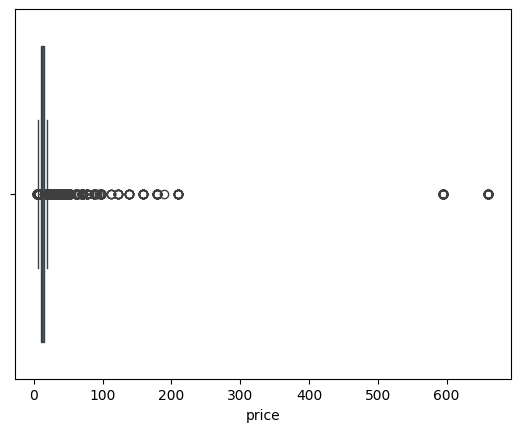

In [71]:
sns.boxplot(x = dt_clean_v4.toPandas()['price'])

We can see that some products are priced much higher than most of the data.

Let's check which products have a price over 600.

In [72]:
dt_clean_v4.where( dt_clean_v4.price > 600 ).select("product_id", "product_name", "price").distinct().show(truncate = False)

+----------+----------------------------+------+
|product_id|product_name                |price |
+----------+----------------------------+------+
|22656     |Vintage Blue Kitchen Cabinet|660.62|
|22655     |Vintage Red Kitchen Cabinet |660.62|
+----------+----------------------------+------+



Try searching the product name on Google to see if it’s really expensive.

It turns out to be a storage cabinet — a large product with a vintage (old-cool) style. So it’s not surprising that this item is expensive.

In this case, it is indeed an outlier, but it is not incorrect data, so there’s no need to fix anything.

### Let's try cleaning the data using Spark SQL

In [73]:
# Convert the Spark DataFrame into a TempView first
dt.createOrReplaceTempView("data")
dt_sql = spark.sql("SELECT * FROM data")
dt_sql.show()

+--------------+----------+----------+-----+--------+-----------+--------------------+----------------+-------------+------------------+------------------+
|transaction_id|      date|product_id|price|quantity|customer_id|        product_name|customer_country|customer_name|      total_amount|        thb_amount|
+--------------+----------+----------+-----+--------+-----------+--------------------+----------------+-------------+------------------+------------------+
|        581482|2024-05-10|     22485|21.47|      12|    17490.0|Set Of 2 Wooden M...|  United Kingdom| Sara Griffin|            257.64|        11792.1828|
|        581475|2024-05-10|     22596|10.65|      36|    13069.0|Christmas Star Wi...|  United Kingdom| Michael Holt|383.40000000000003|17548.218000000004|
|        581475|2024-05-10|     23235|11.53|      12|    13069.0|Storage Tin Vinta...|  United Kingdom| Michael Holt|138.35999999999999|         6332.7372|
|        581475|2024-05-10|     23272|10.65|      12|    13069.0

In [74]:
# Try converting the code for listing country names from Exercise 4 into SQL
dt_sql_country = spark.sql("""
SELECT DISTINCT customer_country
FROM data
ORDER BY customer_country
""")
dt_sql_country.show(100)


+--------------------+
|    customer_country|
+--------------------+
|           Australia|
|             Austria|
|             Bahrain|
|             Belgium|
|              Brazil|
|              Canada|
|     Channel Islands|
|              Cyprus|
|      Czech Republic|
|             Denmark|
|                EIRE|
|  European Community|
|             Finland|
|              France|
|             Germany|
|              Greece|
|           Hong Kong|
|             Iceland|
|              Israel|
|               Italy|
|               Japan|
|              Japane|
|             Lebanon|
|           Lithuania|
|               Malta|
|         Netherlands|
|              Norway|
|              Poland|
|            Portugal|
|                 RSA|
|        Saudi Arabia|
|           Singapore|
|               Spain|
|              Sweden|
|         Switzerland|
|                 USA|
|United Arab Emirates|
|      United Kingdom|
|         Unspecified|
+--------------------+



In [75]:
# Try converting the code for replacing country names from Exercise 4 into SQL
dt_sql_transform = spark.sql("""
SELECT
    transaction_id,
    date,
    product_id,
    price,
    quantity,
    customer_id,
    product_name,
    CASE WHEN customer_country = 'Japane' THEN 'Japan' ELSE customer_country END AS customer_country,
    customer_name,
    total_amount,
    thb_amount
FROM
    data
""")
dt_sql_transform.show()


+--------------+----------+----------+-----+--------+-----------+--------------------+----------------+-------------+------------------+------------------+
|transaction_id|      date|product_id|price|quantity|customer_id|        product_name|customer_country|customer_name|      total_amount|        thb_amount|
+--------------+----------+----------+-----+--------+-----------+--------------------+----------------+-------------+------------------+------------------+
|        581482|2024-05-10|     22485|21.47|      12|    17490.0|Set Of 2 Wooden M...|  United Kingdom| Sara Griffin|            257.64|        11792.1828|
|        581475|2024-05-10|     22596|10.65|      36|    13069.0|Christmas Star Wi...|  United Kingdom| Michael Holt|383.40000000000003|17548.218000000004|
|        581475|2024-05-10|     23235|11.53|      12|    13069.0|Storage Tin Vinta...|  United Kingdom| Michael Holt|138.35999999999999|         6332.7372|
|        581475|2024-05-10|     23272|10.65|      12|    13069.0

In [76]:
# Check whether the results are correct
dt_sql_transform.select("customer_country").distinct().sort("customer_country").show(50)


+--------------------+
|    customer_country|
+--------------------+
|           Australia|
|             Austria|
|             Bahrain|
|             Belgium|
|              Brazil|
|              Canada|
|     Channel Islands|
|              Cyprus|
|      Czech Republic|
|             Denmark|
|                EIRE|
|  European Community|
|             Finland|
|              France|
|             Germany|
|              Greece|
|           Hong Kong|
|             Iceland|
|              Israel|
|               Italy|
|               Japan|
|             Lebanon|
|           Lithuania|
|               Malta|
|         Netherlands|
|              Norway|
|              Poland|
|            Portugal|
|                 RSA|
|        Saudi Arabia|
|           Singapore|
|               Spain|
|              Sweden|
|         Switzerland|
|                 USA|
|United Arab Emirates|
|      United Kingdom|
|         Unspecified|
+--------------------+



####Exercise 7
Do Exercise 5 using SQL instead of Python.

In [77]:
#Check whether there are any product_ids that are not 5-character alphanumeric strings.
dt_sql_check_productid = spark.sql("""
SELECT *
FROM data
WHERE product_id NOT RLIKE "^.{5}$"

""").show()

+--------------+----------+----------+-----+--------+-----------+--------------------+----------------+--------------+------------------+------------------+
|transaction_id|      date|product_id|price|quantity|customer_id|        product_name|customer_country| customer_name|      total_amount|        thb_amount|
+--------------+----------+----------+-----+--------+-----------+--------------------+----------------+--------------+------------------+------------------+
|        581476|2024-05-10|    84596F|10.68|      32|    12433.0|Small Marshmallow...|          Norway|Kelli Sandoval|            341.76|        15642.3552|
|        581476|2024-05-10|    84596B|10.68|      16|    12433.0|Small Dolly Mix D...|          Norway|Kelli Sandoval|            170.88|         7821.1776|
|        581476|2024-05-10|    84510A|11.53|      20|    12433.0|Set Of 4 English ...|          Norway|Kelli Sandoval|             230.6|         10554.562|
|        581476|2024-05-10|    47559B|11.53|      10|    1

In [78]:
#Replace product_id with its first 5 characters.

dt_sql_productid_clean = spark.sql("""
SELECT
    transaction_id,
    CASE
      WHEN length (product_id) > 5
      THEN substr (product_id,1,5)
      ELSE product_id
    END AS product_id,
    price,
    quantity,
    customer_id,
    product_name,
    customer_country,
    customer_name,
    total_amount,
    thb_amount
FROM
    data
""")
dt_sql_productid_clean.show()

+--------------+----------+-----+--------+-----------+--------------------+----------------+-------------+------------------+------------------+
|transaction_id|product_id|price|quantity|customer_id|        product_name|customer_country|customer_name|      total_amount|        thb_amount|
+--------------+----------+-----+--------+-----------+--------------------+----------------+-------------+------------------+------------------+
|        581482|     22485|21.47|      12|    17490.0|Set Of 2 Wooden M...|  United Kingdom| Sara Griffin|            257.64|        11792.1828|
|        581475|     22596|10.65|      36|    13069.0|Christmas Star Wi...|  United Kingdom| Michael Holt|383.40000000000003|17548.218000000004|
|        581475|     23235|11.53|      12|    13069.0|Storage Tin Vinta...|  United Kingdom| Michael Holt|138.35999999999999|         6332.7372|
|        581475|     23272|10.65|      12|    13069.0|Tree T-Light Hold...|  United Kingdom| Michael Holt|127.80000000000001| 5849

In [79]:
# Check whether the data matches the desired format
# Tip: ~ = NOT (makes the condition the opposite)

dt_sql_productid_clean.filter(~dt_sql_productid_clean["product_id"].rlike("^.{5}$")).show()

+--------------+----------+-----+--------+-----------+------------+----------------+-------------+------------+----------+
|transaction_id|product_id|price|quantity|customer_id|product_name|customer_country|customer_name|total_amount|thb_amount|
+--------------+----------+-----+--------+-----------+------------+----------------+-------------+------------+----------+
+--------------+----------+-----+--------+-----------+------------+----------------+-------------+------------+----------+



# Step 5: Data Export in PySpark

##Parquet Export

Save as a Parquet file — a lightweight file format that also stores the data type of each column.

In [80]:
dt_clean_v4.write.parquet("cleaned_data_output2.parquet")

Try reading the Parquet file you just saved to check that the file works correctly.

In [81]:
dt2 = spark.read.parquet("cleaned_data_output2.parquet")

dt2.show(10)

+--------------+-------------------+----------+-----+--------+-----------+--------------------+-------------+------------------+------------------+----------------+
|transaction_id|               date|product_id|price|quantity|customer_id|        product_name|customer_name|      total_amount|        thb_amount|customer_country|
+--------------+-------------------+----------+-----+--------+-----------+--------------------+-------------+------------------+------------------+----------------+
|        581482|2024-05-10 00:00:00|     22485|21.47|      12|    17490.0|Set Of 2 Wooden M...| Sara Griffin|            257.64|        11792.1828|  United Kingdom|
|        581475|2024-05-10 00:00:00|     22596|10.65|      36|    13069.0|Christmas Star Wi...| Michael Holt|383.40000000000003|17548.218000000004|  United Kingdom|
|        581475|2024-05-10 00:00:00|     23235|11.53|      12|    13069.0|Storage Tin Vinta...| Michael Holt|138.35999999999999|         6332.7372|  United Kingdom|
|        5

Try writing the file with the same name.

In [82]:
dt_clean.write.parquet("cleaned_data_output.parquet")
# dt_clean.write.mode("overwrite").parquet("cleaned_data_output.parquet")

In [83]:
 dt_clean.write.mode("overwrite").parquet("cleaned_data_output.parquet")

## CSV Export
If you’re working with a team that needs CSV tables, we can export directly from Spark.


In [84]:
# Save as CSV
dt_clean.write.csv('cleaned_data.csv', header=True)

##Excel Export

But if the team wants an Excel file, we can use Pandas.

In [85]:
dt_clean.toPandas().to_excel("output.xlsx")